In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import scikit learn

In [8]:
train = np.load('./train.npz')
test = np.load('./test.npz')

In [14]:
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

Print the shape of the preprocessed X to check the data

In [24]:
# print first row
X_train.shape

(33887, 43, 13)

As we can see there are 33887 samples with 13 features each and a 43 datapoints per sample. The 13 Features correspond to:

Accelometer X, Y, Z, Mag X, Y, Z, Gyro X, Y, Z, Orientation X, Y, Z, Orientation W

To use these features we need to preprocess them. First of all we calculate the combined lenght of all the directions for each sensor.

In [39]:
def combineAxisOnSensors(input):
    s, n, f = input.shape
    output = np.zeros((s, n, 4))
    # for each sample, sum rows 0-2
    output[:, :, 0] = input[:, :, 0] + input[:, :, 1] + input[:, :, 2]
    # for each sample, sum rows 3-5
    output[:, :, 1] = input[:, :, 3] + input[:, :, 4] + input[:, :, 5]
    # for each sample, sum rows 6-8
    output[:, :, 2] = input[:, :, 6] + input[:, :, 7] + input[:, :, 8]
    # for each sample, sum rows 9-12
    output[:, :, 3] = input[:, :, 9] + input[:, :, 10] + input[:, :, 11] + input[:, :, 12]
    return output

Next we want to calculate the only the difference between each datapoint.

In [64]:
def createDiffPerSample(input): # TODO: vectorize
    s, n, f = input.shape
    output = np.zeros((s, n, f))
    # calculate the differnce between each sample
    for i in range(s):
        for j in range(n):
            for k in range(f):
                if j == 0:
                    output[i, j, k] = 0
                else:
                    output[i, j, k] = abs(input[i, j-1, k] - input[i, j, k])

    return output

In [51]:
combinedOnSensors = combineAxisOnSensors(X_train)

In [52]:
diffs = createDiffPerSample(combinedOnSensors)

Um uns einmal ein Sample anzuschauen, werden wird das erste Sample plotten.

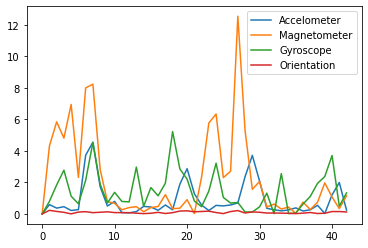

In [62]:
# print first row
plt.plot(diffs[0, :, 0], label = "Accelometer")
plt.plot(diffs[0, :, 1], label = "Magnetometer")
plt.plot(diffs[0, :, 2], label = "Gyroscope")
plt.plot(diffs[0, :, 3], label = "Orientation")
plt.legend()
plt.show()

Nun werden wir pro Sensor ein Clustering Modell trainieren, um die Zeitreihen zu Parameterisieren.

In [74]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KernelKMeans
seed = 420

In [67]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                         max_iter=10, random_state=seed)
model.fit(X_train)

In [81]:
def fit_time_series_clustering(input): # TODO: optimise this function
    models = []
    for i in range(4):
        print("fitting model number {}".format(i))
        model = TimeSeriesKMeans(n_clusters=7, metric="dtw",
                                 max_iter=3, random_state=seed, verbose=True, n_jobs=-1)  # use 7 clusters cause we have 7 activities
        model.fit(input[:, :, i])
        models.append(model)
    return models

In [80]:
def fit_kernel_clustering(input): # TODO: optimise this function
    models = []
    for i in range(4):
        print("fitting model number {}".format(i))
        model = KernelKMeans(n_clusters=7,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=20,
                      verbose=True,
                      random_state=seed,
                      n_jobs=-1)  # use 7 clusters cause we have 7 activities
        model.fit(input[:, :, i])
        models.append(model)
    return models

In [82]:
# fit the model
models = fit_time_series_clustering(diffs)

fitting model number 0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

6.181 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

4.874 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

4.774 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

fitting model number 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

1430.321 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

1015.026 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

1004.304 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

fitting model number 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

21.233 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

16.946 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

16.615 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

fitting model number 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

0.286 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

0.234 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

0.229 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9780 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 11230 tasks 

In [92]:
# method to get the distances from the centroids to each sample
def get_distances(models, input):
    distances = []
    for i in range(4):
        distances.append(models[i].transform(input[:, :, i]))
    
    # stack distances horizontally
    distances = np.hstack(distances)
    return distances

In [93]:
dists = get_distances(models, diffs)

/Users/flavio/opt/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 33887 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed:

In [86]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

In [95]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=seed)

random_forest.fit(dists, y_train)



RandomForestClassifier(random_state=420)

In [96]:
# prepare test data
combinedOnSensorsTest = combineAxisOnSensors(X_test)
diffsTest = createDiffPerSample(combinedOnSensorsTest)
distsTest = get_distances(models, diffsTest)

/Users/flavio/opt/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 8472 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4030 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6030 tasks      | elapsed: 

In [97]:
# get test score of random forest
random_forest.score(distsTest, y_test)

0.7427998111425873